<h1 align="center"> NAME:ANKITA YADAV</h1>

<h1 align="center"> TASK1: PREDICTION USING SUPERVISED LEARNING </h1>

<h2>Objective: Predict the percentage of an student based on the no. of study hours.</h2>

### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Get the data

In [2]:
data= pd.read_csv(r"C:\Users\SONY\Desktop\student.csv")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Get some usefull info about data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.shape

(25, 2)

In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

* It means there is no null data.

## EXPLORATORY DATA  ANALYSIS

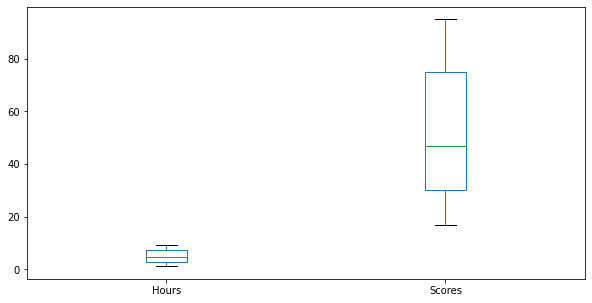

In [6]:
data.plot(kind="box",figsize=(10,5));

* Data has no outliers .

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


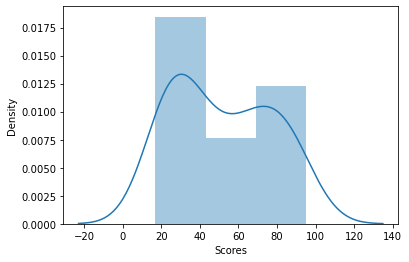

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


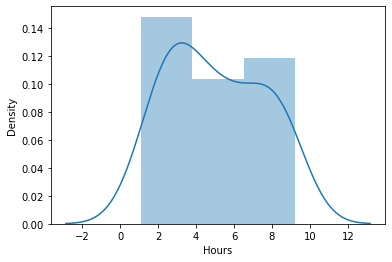

In [7]:
sns.distplot(data["Scores"])
plt.show()

sns.distplot(data["Hours"])
plt.show()



The graph indicates that the both attributes are Bimodal.

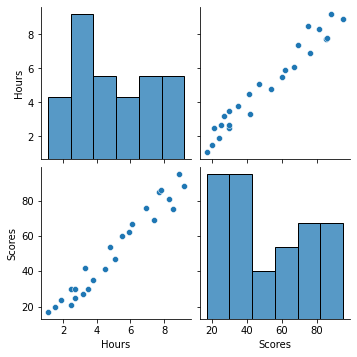

In [8]:
sns.pairplot(data=data)

Text(0, 0.5, 'studied hours')

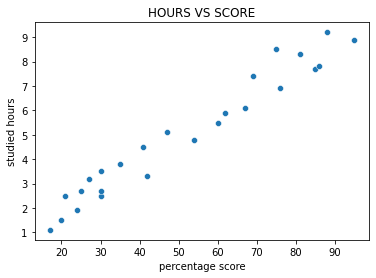

In [9]:
sns.scatterplot(x=data["Scores"],y=data["Hours"])
plt.title("HOURS VS SCORE")
plt.xlabel("percentage score")
plt.ylabel("studied hours")


#####  Above graphs indicates that the variables are linearly dependant on each other.

<AxesSubplot:>

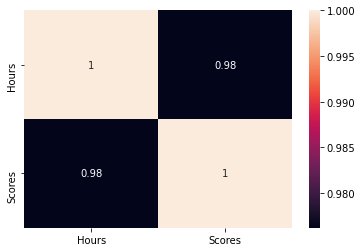

In [10]:
sns.heatmap(data.corr(),annot=True)

Above heatmap indicates that there is high positive correlation between score and hours.

## Preparing the data

Divide the data into attributes (input) and labels (outputs).

In [11]:
x= data.iloc[:,:-1].values
y= data.iloc[:,1].values

Now,Split this data into training and test sets using Scikit- Learn's
built-in train_test_split() method.



In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## Training of Algorithm

Now is finally the time to train our algorirthm.

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

## Making Predictions

Now we have trained our algorithm, its time to make some predictions.

In [16]:
y_pred = lin_reg.predict(x_test)#predicting the scores

In [18]:
#Comparing Actual vs Predicted
df2= pd.DataFrame({"Actual": y_test,"Predicted": y_pred})
df2

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033



## Evaluation of model


In [19]:
from sklearn import metrics
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002975


## What will be predicted score if a student studies for 9.25 hrs/day?